<a href="https://colab.research.google.com/github/raisaurabh44/U-S-Honey-Data-Set/blob/main/Heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os # path to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings # warning filter
warnings.filterwarnings('ignore')

# Pllot libraries
import matplotlib.pyplot as plt
import seaborn as sns

# relevent ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# ML models
from sklearn.tree import DecisionTreeClassifier

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Project/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [102]:
col=df.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
df[df.duplicated()==True].index

Int64Index([164], dtype='int64')

In [32]:
df[df.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [38]:
df[df['target']==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [41]:
df.drop_duplicates(inplace=True)


In [42]:
df.duplicated().sum()

0

Visualization

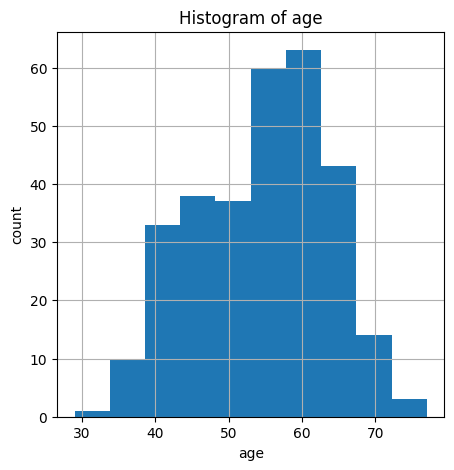

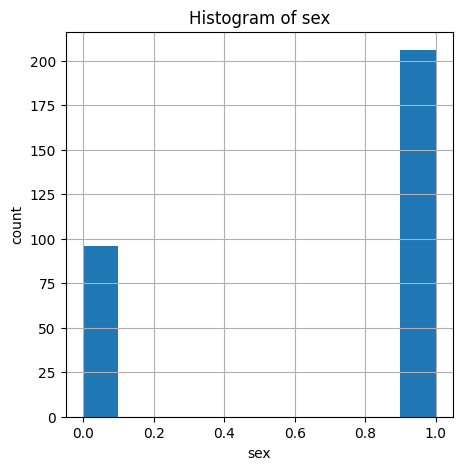

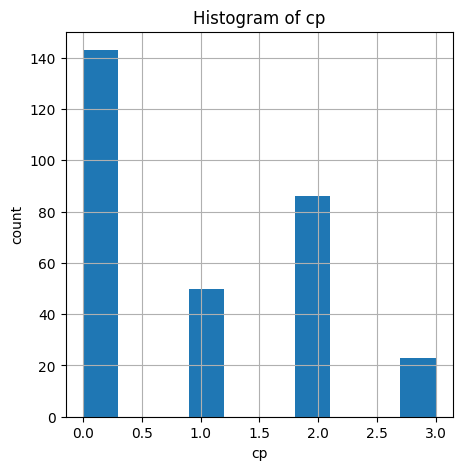

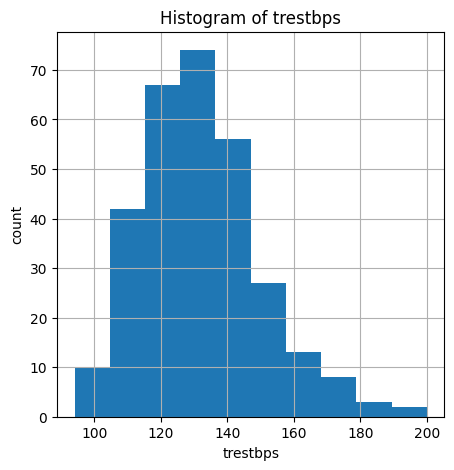

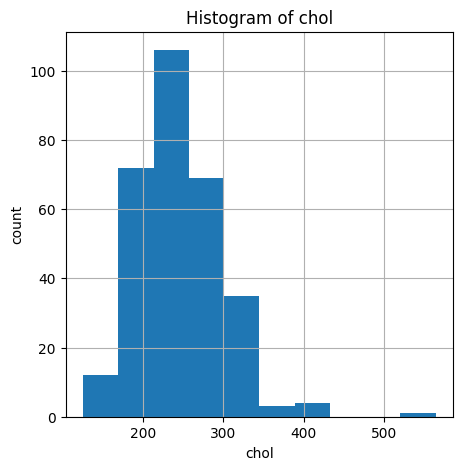

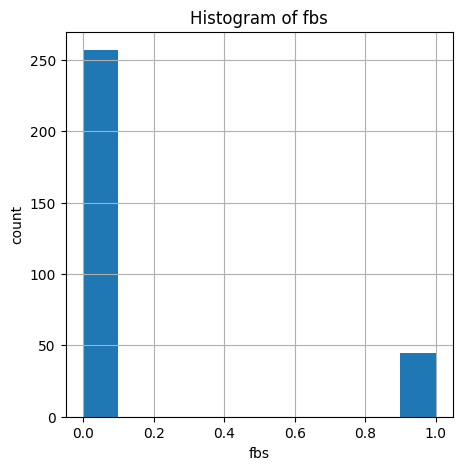

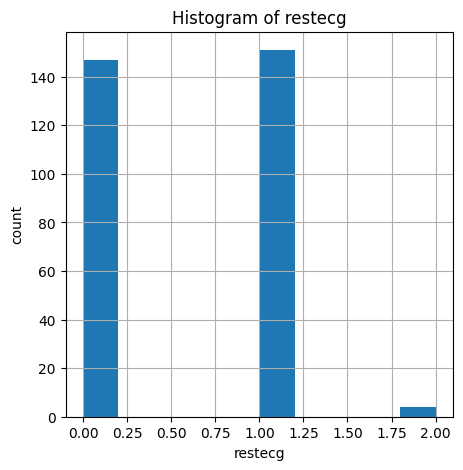

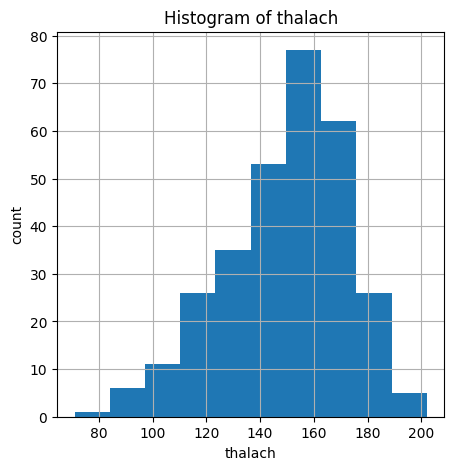

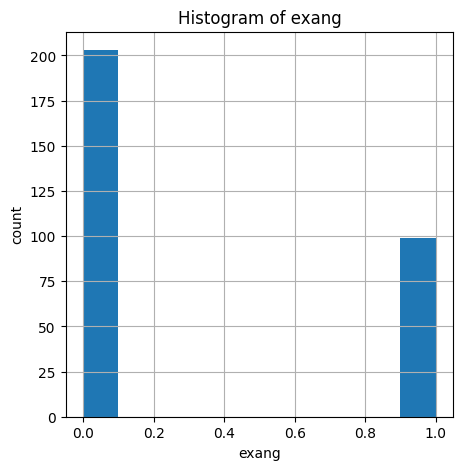

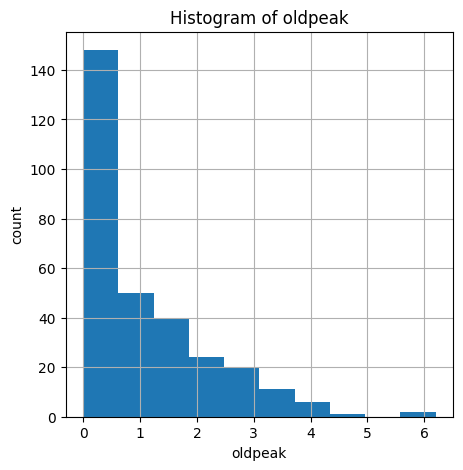

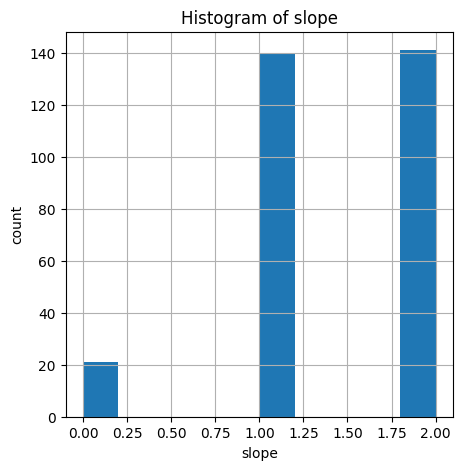

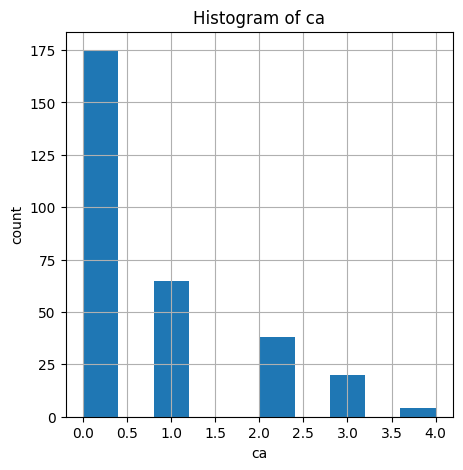

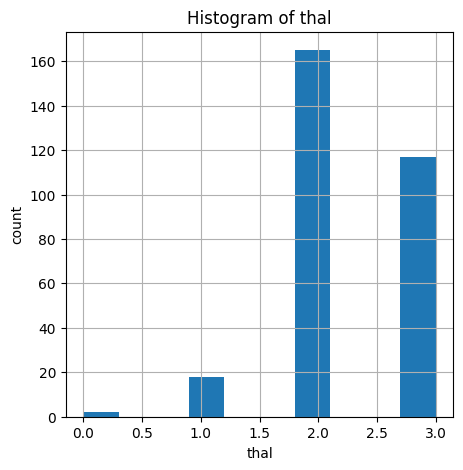

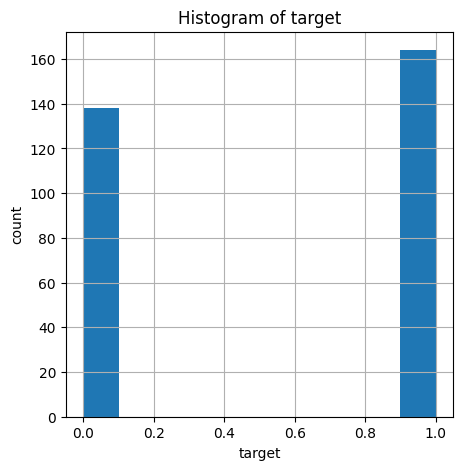

In [98]:
# histogram
for i in df.columns:
  plt.figure(figsize=(5,5))
  df[i].hist()
  plt.xlabel(i)
  plt.ylabel('count')
  plt.title(f'Histogram of {i}')
  plt.show()

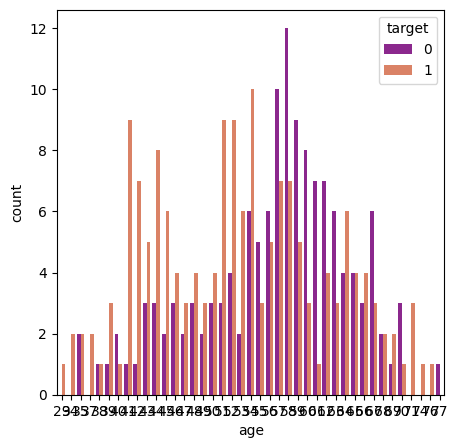

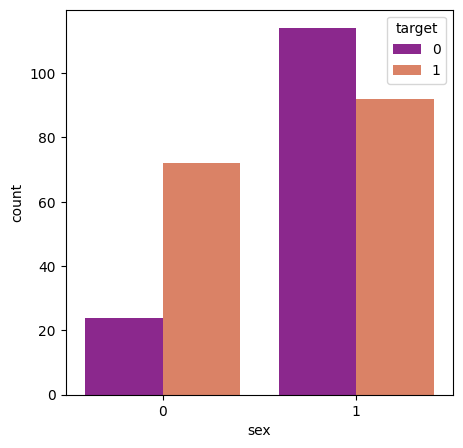

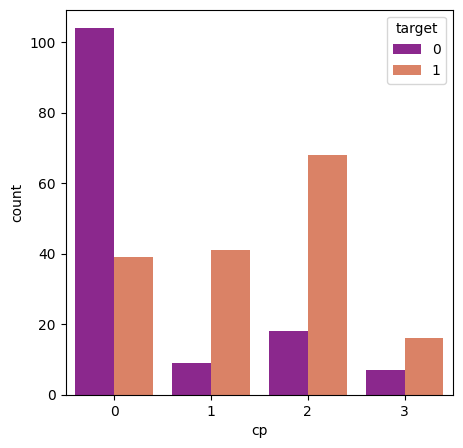

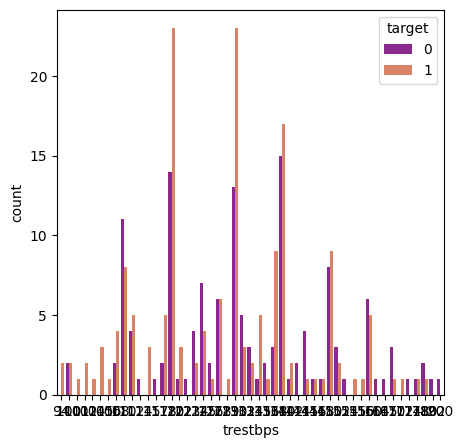

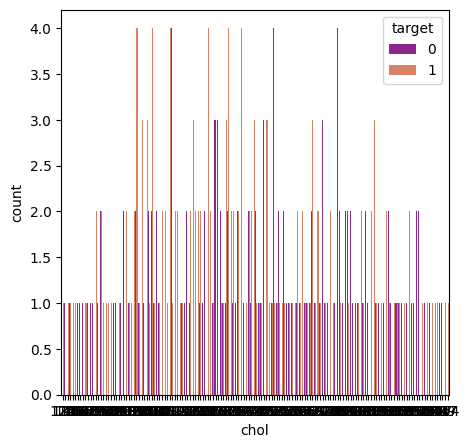

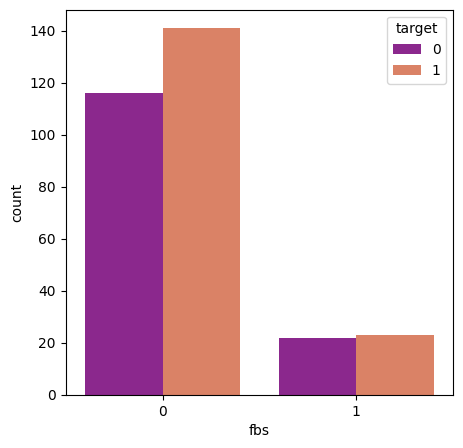

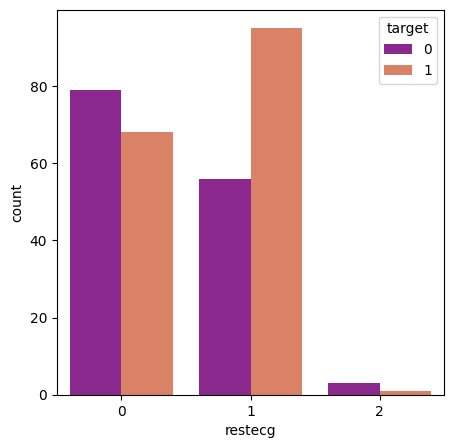

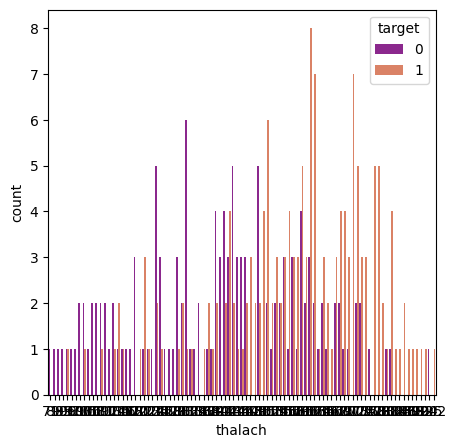

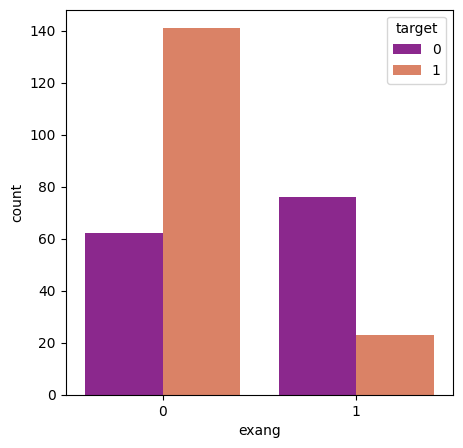

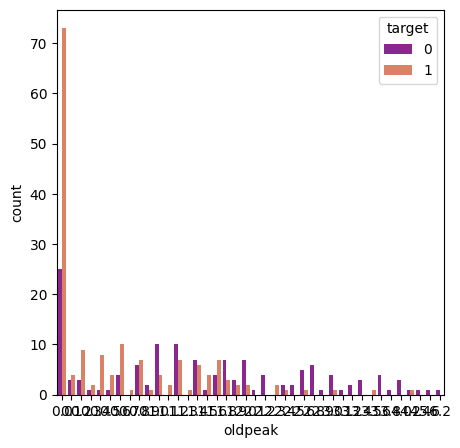

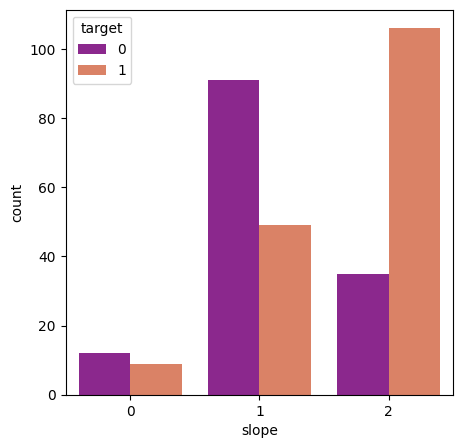

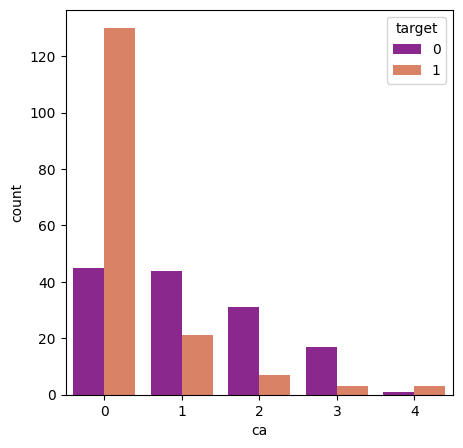

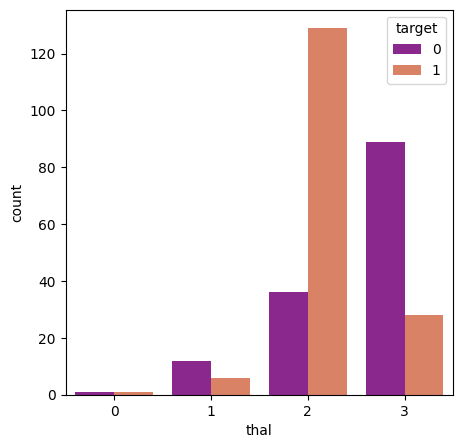

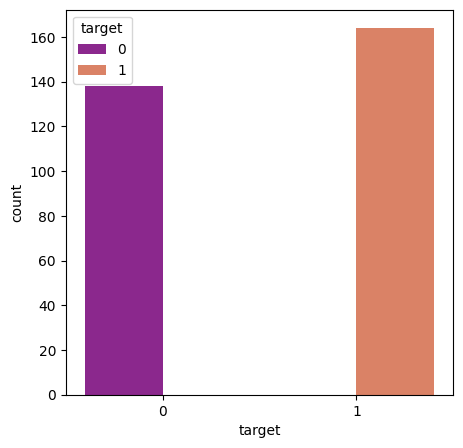

In [101]:
for i in df:
  plt.figure(figsize=(5,5))
  sns.countplot(df, x=i,hue='target',palette='plasma')
  plt.xlabel(i)
  plt.show()

<Axes: >

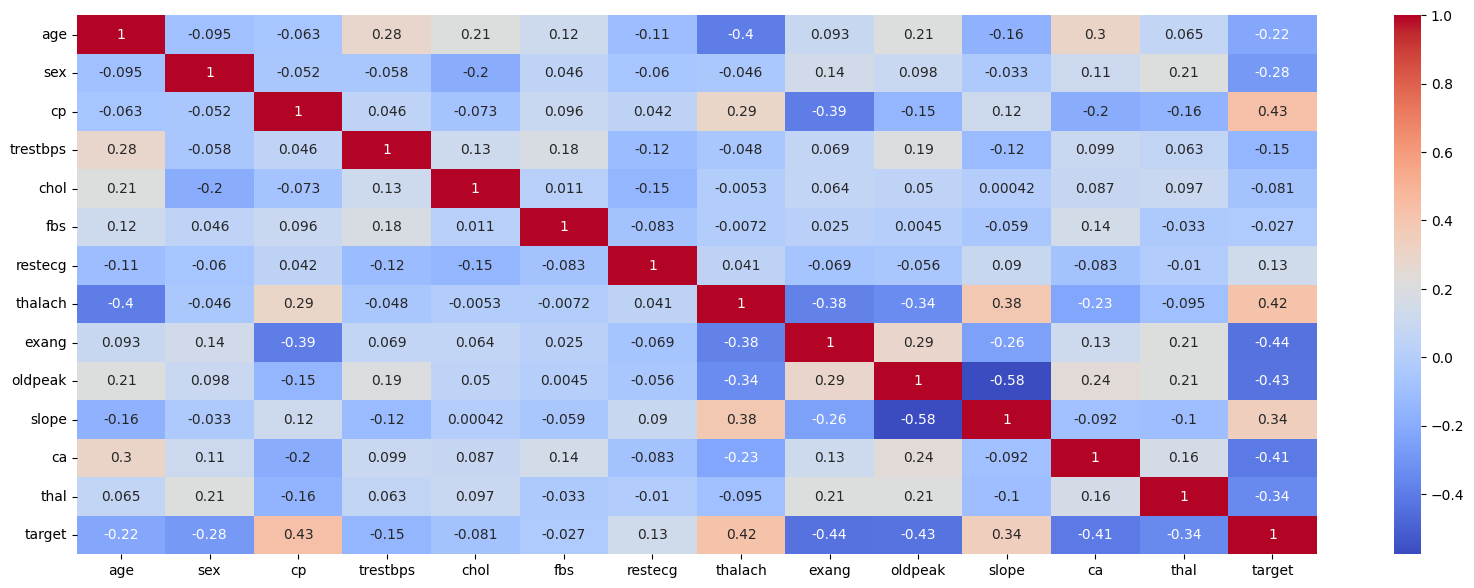

In [57]:
plt.rcParams['figure.figsize']=(20,7)
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 43.5 KB


In [72]:
# Decision tree
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [73]:
x.shape, y.shape

((302, 13), (302,))

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True )

In [86]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [87]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_predict =  DT.predict(x_test)

# printing the summery report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [88]:
print(accuracy_score(y_predict,y_test, normalize=True))

0.7540983606557377


In [89]:
# confusion metrix
confusion_matrix(y_predict, y_test)

array([[22,  8],
       [ 7, 24]])

In [93]:
from sklearn import tree

[Text(0.5392441860465116, 0.95, 'x[2] <= 0.5\ngini = 0.495\nsamples = 241\nvalue = [109, 132]'),
 Text(0.28488372093023256, 0.85, 'x[11] <= 0.5\ngini = 0.387\nsamples = 118\nvalue = [87, 31]'),
 Text(0.1744186046511628, 0.75, 'x[12] <= 2.5\ngini = 0.499\nsamples = 54\nvalue = [26, 28]'),
 Text(0.09302325581395349, 0.65, 'x[8] <= 0.5\ngini = 0.383\nsamples = 31\nvalue = [8, 23]'),
 Text(0.046511627906976744, 0.55, 'x[7] <= 96.5\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.023255813953488372, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06976744186046512, 0.45, 'x[4] <= 316.5\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.046511627906976744, 0.35, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.09302325581395349, 0.35, 'x[7] <= 163.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06976744186046512, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11627906976744186, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1395348837209

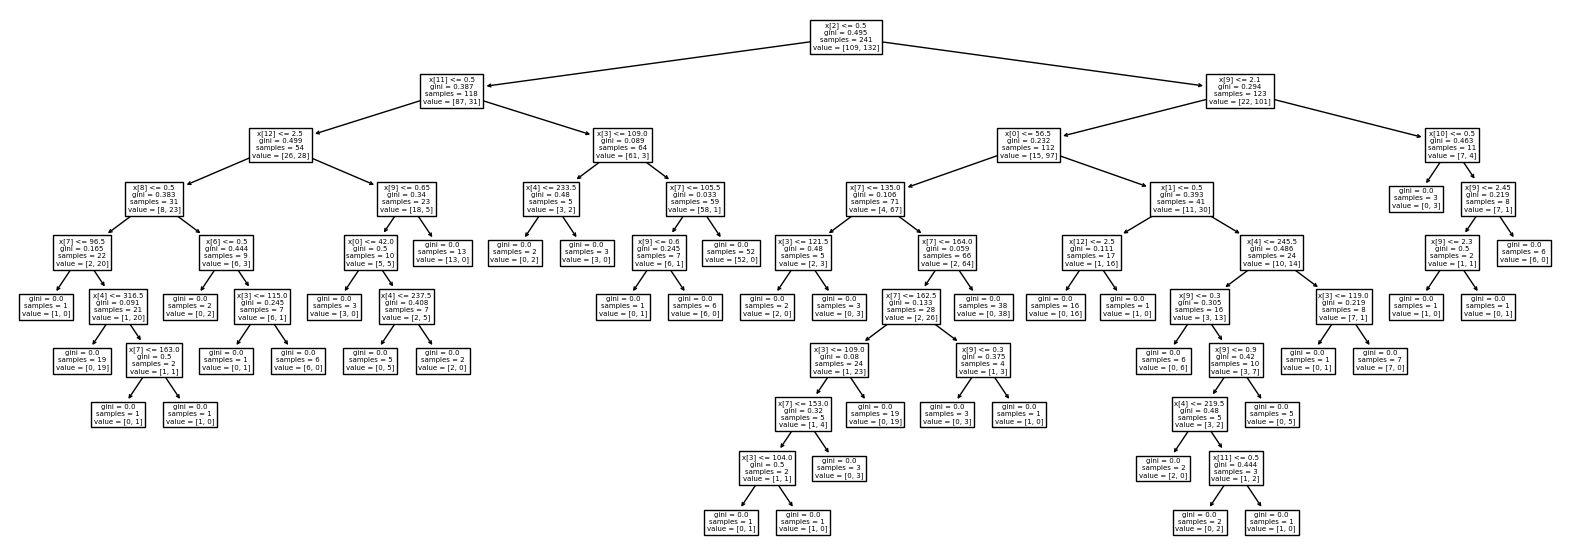

In [97]:
tree.plot_tree(DT)

In [ ]:
#Ramesh Sir
#enhancing the accuracy
#-->EDA
#-->Outlier
#-->feature selection statistics--> corr, VIF , Chi-square
#-->feature extraction-->pca , lda
#-->Encoding -->lable encoding , one hot encoding
#-->scaling --> normalization and standarization
#-->model_selection
#-->fitting
#-->overfitting , underfitting, balanced
#-->accuracy, confusion metrix/r2_score, RMSE, MSE, MAE
#-->hyperparameter tunning--> max_depth, min-smapling_split, min_sampling_leaf

enhancing the accuracy
--> EDA
-->Outlier
-->feature selection--> corr, VIF , Chi-square
-->feature extraction-->pca , lda
-->Encoding -->lable encoding , one hot encoding
-->scaling --> normalization and standarization
-->model_selection
-->fitting
-->accuracy
-->hyperparameter tunning